<a href="https://colab.research.google.com/github/lauren-kirsh/Data-Science-Portfolio/blob/main/HW2_DS_UA_202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Responsible Data Science Spring 2021: Homework 2

This notebook contains sample code; other methods at arriving at the correct answer were also accepted.

Install the Data Synthesizer library.

In [ ]:
!pip install DataSynthesizer

In [ ]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import normalize_given_distribution, read_json_file, pairwise_attributes_mutual_information, mutual_information, set_random_seed

from IPython.display import clear_output
from scipy.stats import entropy, ks_2samp
from scipy.spatial.distance import euclidean
from sklearn.metrics import mutual_info_score
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Intialize a describer and a generator
describer = DataDescriber() 
generator = DataGenerator() 

Start with a real dataset __hw_compas__ and a fake dataset __hw_xyz__. Generate synthetic datasets of size __N=10000__, in the following four categories:
- A:  random mode
- B: independent attribute mode with __epsilon = 0.1__
- C:  correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=1
- D: correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=2

In [ ]:
# Packages for reading csv file into Colaboratory:
!pip install -U -q PyDrive==1.3.1

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client. 
# Please follow the steps as instructed when you run the following commands. 

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

The **hw_compas** dataset has attributes age, sex, score, and race, with the following domains of values: age is an integer between 18 and 96, sex is one of ‘Male’ or ‘Female’, score is an integer between -1 and 10, race is one of 'Other', 'Caucasian', 'African-American', 'Hispanic', 'Asian', 'Native American'.

The **hw_fake** is a synthetically generated dataset. We call this dataset “fake” rather than “synthetic” because you will be using it as input to the Data Synthesizer. We will use the term “synthetic” to refer to privacy-preserving datasets that are produced as the output of the Data Synthesizer.

In [ ]:
fileid_compas = '12nKVg66nQkHX9gLFL-wXpgppCNSoasFJ'    
real_data_file = 'hw_compas.csv'

fileid_fake = '125JShDZAur7zQSugMoLi-JiIohtcvGY1'    
fake_data_file = 'hw_fake.csv'

downloaded = drive.CreateFile({'id':fileid_compas}) 
downloaded.GetContentFile(real_data_file)  
df_real = pd.read_csv(real_data_file)

downloaded = drive.CreateFile({'id':fileid_fake}) 
downloaded.GetContentFile(fake_data_file)  
df_fake = pd.read_csv(fake_data_file)

In [ ]:
# Set up some paths
real_description_files = {'random mode':                   'description(random).json', 
                     'independent attribute mode':    'description(independent).json', 
                     'correlated attribute mode':     'description(correlated).json',
                     'correlated attribute mode k=2':    'description(correlated).json',}
real_synthetic_data_files = {'random mode':                'synthetic data(random).csv', 
                        'independent attribute mode': 'synthetic data(independent).csv', 
                        'correlated attribute mode':  'synthetic data(correlated).csv',
                        'correlated attribute mode k=2':    'synthetic data(correlated).json',}

# Generate synthetic datasets of size N=10000
output_data_size = 10000 

###Real Synthetic Datasets

A: Random mode

In [ ]:
# Generate A/random mode
describer.describe_dataset_in_random_mode(real_data_file)
describer.save_dataset_description_to_file(real_description_files['random mode'])

In [ ]:
# !cat 'description(random).json'

In [ ]:
generator.generate_dataset_in_random_mode(n=output_data_size, 
                                          description_file=real_description_files['random mode'], 
                                          seed=0, 
                                          minimum=0, 
                                          maximum=100)

In [ ]:
generator.save_synthetic_data(real_synthetic_data_files['random mode'])

a_random = pd.read_csv(real_synthetic_data_files['random mode'])

In [ ]:
a_random.head()

,sex,age,race,score
0,Male,9,Native American,10
1,Female,35,Hispanic,1
2,Female,78,Other,6
3,Male,32,African-American,6
4,Female,58,Hispanic,9


B: Independent mode (epsilon = 0.1)

In [ ]:
# Generate B/independent attribute mode with epsilon = 0.1
describer.describe_dataset_in_independent_attribute_mode(real_data_file, epsilon=0.1)
describer.save_dataset_description_to_file(real_description_files['independent attribute mode'])

In [ ]:
generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                          description_file=real_description_files['independent attribute mode'], 
                                          seed=0)

In [ ]:
generator.save_synthetic_data(real_synthetic_data_files['independent attribute mode'])
b_independent = pd.read_csv(real_synthetic_data_files['independent attribute mode'])

In [ ]:
b_independent.head()

,sex,age,race,score
0,Male,45.0,African-American,7
1,Male,25.0,African-American,4
2,Male,27.0,Native American,1
3,Male,19.0,African-American,8
4,Male,20.0,Other,4


C: Correlated mode (epsilon=0.1, k=1)

In [ ]:
# Generate C/correlated attribute mode with epsilon = 0.1, Bayes net degree k=1
describer.describe_dataset_in_correlated_attribute_mode(real_data_file, 
                                                        epsilon=0.1, 
                                                        k=1)
# display_bayesian_network(describer.bayesian_network)

describer.save_dataset_description_to_file(real_description_files['correlated attribute mode'])

================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute sex
Adding attribute race
========================== BN constructed ==========================


In [ ]:
generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                          description_file=real_description_files['correlated attribute mode'], 
                                          seed=0)

In [ ]:
generator.save_synthetic_data(real_synthetic_data_files['correlated attribute mode'])
c_correlate = pd.read_csv(real_synthetic_data_files['correlated attribute mode'])

In [ ]:
c_correlate.head()

,sex,age,race,score
0,Male,60.0,Asian,5
1,Male,37.0,Caucasian,7
2,Male,20.0,Caucasian,5
3,Male,23.0,Hispanic,5
4,Male,28.0,African-American,4


D: Correlated mode(epsilon=0.1, k=2)

In [ ]:
# Generate D/correlated attribute mode with epsilon = 0.1, Bayes net degree k=2
describer.describe_dataset_in_correlated_attribute_mode(real_data_file, 
                                                        epsilon=0.1, 
                                                        k=2)
# display_bayesian_network(describer.bayesian_network)

describer.save_dataset_description_to_file(real_description_files['correlated attribute mode k=2'])

================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute sex
Adding attribute race
========================== BN constructed ==========================


In [ ]:
generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                          description_file=real_description_files['correlated attribute mode k=2'], 
                                          seed=0)

In [ ]:
generator.save_synthetic_data(real_synthetic_data_files['correlated attribute mode k=2'])
d_correlate = pd.read_csv(real_synthetic_data_files['correlated attribute mode k=2'])

In [ ]:
d_correlate.head()

,sex,age,race,score
0,Male,72.0,African-American,5
1,Male,79.0,African-American,7
2,Male,47.0,African-American,5
3,Female,39.0,Caucasian,5
4,Male,24.0,African-American,3


###Fake Synthetic Dataset 

In [ ]:
# Set up some paths
fake_description_files = {'random mode':                   'description(random).json', 
                     'independent attribute mode':    'description(independent).json', 
                     'correlated attribute mode':     'description(correlated).json',
                     'correlated attribute mode k=2':    'description(correlated).json',}
fake_synthetic_data_files = {'random mode':                'synthetic data(random).csv', 
                        'independent attribute mode': 'synthetic data(independent).csv', 
                        'correlated attribute mode':  'synthetic data(correlated).csv',
                        'correlated attribute mode k=2':    'synthetic data(correlated).json',}


A: Random mode 

In [ ]:
# Generate A/random mode
describer.describe_dataset_in_random_mode(fake_data_file)
describer.save_dataset_description_to_file(fake_description_files['random mode'])

In [ ]:
generator.generate_dataset_in_random_mode(n=output_data_size, 
                                          description_file=fake_description_files['random mode'], 
                                          seed=0, 
                                          minimum=0, 
                                          maximum=100)

In [ ]:
generator.save_synthetic_data(fake_synthetic_data_files['random mode'])

a_fake_random = pd.read_csv(fake_synthetic_data_files['random mode'])

In [ ]:
a_fake_random.head()

,parent_1,parent_2,child_1,child_2
0,0,1,1,1
1,2,2,0,0
2,0,1,0,1
3,2,1,0,2
4,2,0,2,2


B: Independent mode (epsilon=0.1)

In [ ]:
# Generate B/independent attribute mode with epsilon = 0.1
describer.describe_dataset_in_independent_attribute_mode(fake_data_file, epsilon=0.1)
describer.save_dataset_description_to_file(fake_description_files['independent attribute mode'])

In [ ]:
generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                          description_file=fake_description_files['independent attribute mode'], 
                                          seed=0)

In [ ]:
generator.save_synthetic_data(fake_synthetic_data_files['independent attribute mode'])
b_fake_independent = pd.read_csv(fake_synthetic_data_files['independent attribute mode'])

C: Correlated mode (epsilon=0.1, k=1)

In [ ]:
# Generate C/correlated attribute mode with epsilon = 0.1, Bayes net degree k=1
describer.describe_dataset_in_correlated_attribute_mode(fake_data_file, 
                                                        epsilon=0.1, 
                                                        k=1)
# display_bayesian_network(describer.bayesian_network)

describer.save_dataset_description_to_file(fake_description_files['correlated attribute mode'])

================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute parent_2
Adding attribute child_1
Adding attribute parent_1
========================== BN constructed ==========================


In [ ]:
generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                          description_file=fake_description_files['correlated attribute mode'], 
                                          seed=0)

In [ ]:
generator.save_synthetic_data(fake_synthetic_data_files['correlated attribute mode'])
c_fake_correlate = pd.read_csv(fake_synthetic_data_files['correlated attribute mode'])

D: Correlated mode (epsilon=0.1, k=2)

In [ ]:
# Generate D/correlated attribute mode with epsilon = 0.1, Bayes net degree k=2
describer.describe_dataset_in_correlated_attribute_mode(fake_data_file, 
                                                        epsilon=0.1, 
                                                        k=2)
# display_bayesian_network(describer.bayesian_network)

describer.save_dataset_description_to_file(fake_description_files['correlated attribute mode k=2'])

================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute parent_2
Adding attribute child_1
Adding attribute parent_1
========================== BN constructed ==========================


In [ ]:
generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                          description_file=fake_description_files['correlated attribute mode k=2'], 
                                          seed=0)

In [ ]:
generator.save_synthetic_data(fake_synthetic_data_files['correlated attribute mode k=2'])
d_fake_correlate = pd.read_csv(fake_synthetic_data_files['correlated attribute mode k=2'])

## Part (a)

### Q1

Median, Mean, Min, Max of __age__ for each setting A, B, C and D, compare to the ground truth value in __hw_compas__, present results in a table

In [ ]:
a_values = [a_random["age"].median(),a_random["age"].mean(),a_random["age"].min(),a_random["age"].max()]
b_values = [b_independent["age"].median(),b_independent["age"].mean(),b_independent["age"].min(),b_independent["age"].max()]
c_values = [c_correlate["age"].median(),c_correlate["age"].mean(),c_correlate["age"].min(),c_correlate["age"].max()]
d_values = [d_correlate["age"].median(),d_correlate["age"].mean(),d_correlate["age"].min(),d_correlate["age"].max()]
truth_values = [df_real["age"].median(),df_real["age"].mean(),df_real["age"].min(),df_real["age"].max()] 

In [ ]:
Metric = ['median','mean','min','max']
Metrics = {'Setting': Metric,"A":a_values, "B":b_values, "C": c_values, "D": d_values, 'Ground Truth': truth_values}


In [ ]:
values = pd.DataFrame(Metrics)
table = pd.pivot_table(values, columns=['Setting'])
table

Setting,max,mean,median,min
A,100.0,50.300800,50.0,0.0
B,96.0,36.883400,32.0,18.0
C,96.0,45.264100,38.0,18.0
D,96.0,45.581500,40.0,18.0
Ground Truth,96.0,35.143319,32.0,18.0


### Q2

Plot the distributions of values of age and sex attributes in hw_compas and in synthetic datasets generated under settings A and B. 
Some more sophisticated statistical measure that’s good for independent attribute mode - __Two-sample Kolmogorov–Smirnov test__ and __KL-divergence__. Also show the difference visually, comparing real vs. synthetic

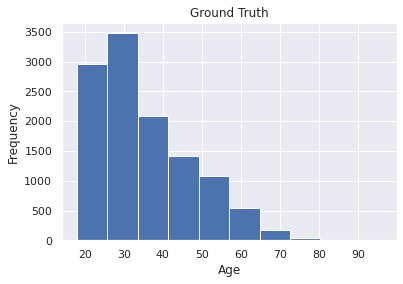

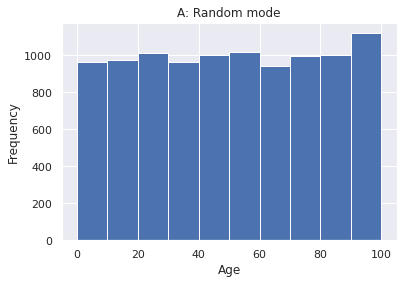

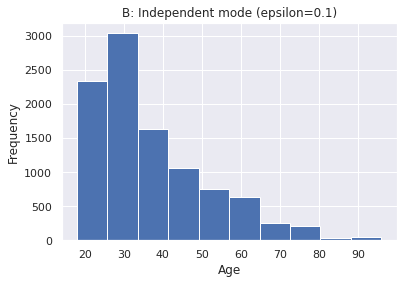

'\nc_correlate["age"].hist()\nplt.xlabel("Age")\nplt.ylabel("Frequency")\nplt.title("Correlated mode (epsilon=0.1, k=1)")\nplt.show()\n\nd_correlate["age"].hist()\nplt.xlabel("Age")\nplt.ylabel("Frequency")\nplt.title("Correlated mode (epsilon=0.1, k=2)")\nplt.show()\n'

In [ ]:
# plot distributions for age
df_real["age"].hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Ground Truth")
plt.show()

a_random["age"].hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("A: Random mode")
plt.show()

b_independent["age"].hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("B: Independent mode (epsilon=0.1)")
plt.show()

'''
c_correlate["age"].hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Correlated mode (epsilon=0.1, k=1)")
plt.show()

d_correlate["age"].hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Correlated mode (epsilon=0.1, k=2)")
plt.show()
'''

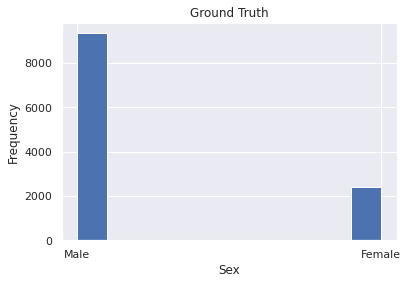

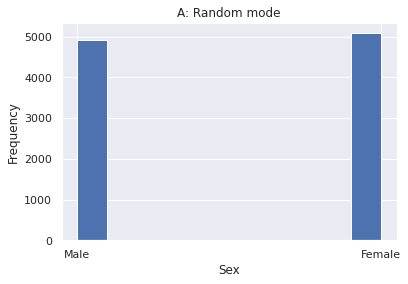

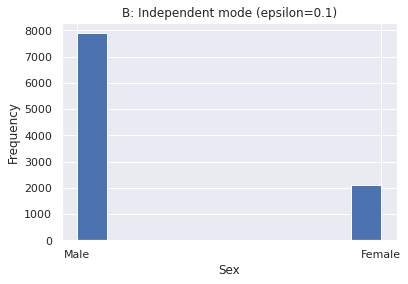

'\nc_correlate["sex"].hist()\nplt.xlabel("Sex")\nplt.ylabel("Frequency")\nplt.title("Correlated mode (epsilon=0.1, k=1)")\nplt.show()\n\nd_correlate["sex"].hist()\nplt.xlabel("Sex")\nplt.ylabel("Frequency")\nplt.title("Correlated mode (epsilon=0.1, k=2)")\nplt.show()\n'

In [ ]:
# plot distributions for sex
df_real["sex"].hist()
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("Ground Truth")
plt.show()

a_random["sex"].hist()
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("A: Random mode")
plt.show()

b_independent["sex"].hist()
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("B: Independent mode (epsilon=0.1)")
plt.show()

'''
c_correlate["sex"].hist()
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("Correlated mode (epsilon=0.1, k=1)")
plt.show()

d_correlate["sex"].hist()
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("Correlated mode (epsilon=0.1, k=2)")
plt.show()
'''

#### Two-sample Kolmogorov–Smirnov test for continous attributes

In [ ]:
from scipy.stats import ks_2samp

def ks_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for Two-sample Kolmogorov–Smirnov test.
    """
    return ks_2samp(df_in[attr], df_out[attr])[0]

Age attribute KS test

In [ ]:
ks_test(df_real, a_random, 'age')

0.373353049247257

In [ ]:
ks_test(df_real, b_independent, 'age')

0.053053049247256956

In [ ]:
ks_test(df_real, c_correlate, 'age')

0.2061490941566726

In [ ]:
ks_test(df_real, d_correlate, 'age')

0.21042615463128345

#### KL-divergence for categorical attributes

In [ ]:
from scipy.stats import entropy

def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], distribution_in.index)
    return entropy(distribution_out, distribution_in)

Race attribute KL test (I just wanted to explore more, but this is not included in my report) 

In [ ]:
kl_test(df_real, a_random, 'race') 

1.22342144033677

In [ ]:
kl_test(df_real, b_independent, 'race') 

0.02142080166196068

In [ ]:
kl_test(df_real, c_correlate, 'race') 

0.15248579038221133

In [ ]:
kl_test(df_real, d_correlate, 'race') 

0.18225221125059743

Sex attribute KL test

In [ ]:
kl_test(df_real, a_random, 'sex')

0.22388927416119944

In [ ]:
kl_test(df_real, b_independent, 'sex')

7.844002303542246e-05

In [ ]:
kl_test(df_real, c_correlate, 'sex')

0.00017450426903609442

In [ ]:
kl_test(df_real, d_correlate, 'sex')

0.026819997935613987

### Q3

Compare the accuracy of correlated attribute mode with k=1 (C) and with k=2 (D). Display the __pairwise mutual information matrix by heatmaps__, showing mutual information between all pairs of attributes, in **hw_fake** and in two synthetic datasets (generated under C and D).

In [ ]:
# Use pairwise_attributes_mutual_information function. 
# For function parameters, refer to https://github.com/DataResponsibly/DataSynthesizer/blob/master/DataSynthesizer/lib/utils.py#L31
import numpy as np
from pandas import Series, DataFrame
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score

def pairwise_attributes_mutual_information(dataset):
    """Compute normalized mutual information for all pairwise attributes. Return a DataFrame."""
    sorted_columns = sorted(dataset.columns)
    mi_df = DataFrame(columns=sorted_columns, index=sorted_columns, dtype=float)
    for row in mi_df.columns:
        for col in mi_df.columns:
            mi_df.loc[row, col] = normalized_mutual_info_score(dataset[row].astype(str),
                                                               dataset[col].astype(str),
                                                               average_method='arithmetic')
    return mi_df

In [ ]:
orig_mi_df = pairwise_attributes_mutual_information(df_fake)
print(orig_mi_df)

           child_1   child_2  parent_1  parent_2
child_1   1.000000  0.211242  0.214345  0.195899
child_2   0.211242  1.000000  0.208301  0.200690
parent_1  0.214345  0.208301  1.000000  0.002421
parent_2  0.195899  0.200690  0.002421  1.000000


In [ ]:
c_mi_df = pairwise_attributes_mutual_information(c_fake_correlate)
print(c_mi_df)

           child_1   child_2  parent_1  parent_2
child_1   1.000000  0.007344  0.000981  0.289825
child_2   0.007344  1.000000  0.194178  0.130105
parent_1  0.000981  0.194178  1.000000  0.027984
parent_2  0.289825  0.130105  0.027984  1.000000


In [ ]:
d_mi_df = pairwise_attributes_mutual_information(d_fake_correlate)
print(d_mi_df)

           child_1   child_2  parent_1  parent_2
child_1   1.000000  0.155061  0.043875  0.042497
child_2   0.155061  1.000000  0.183781  0.059603
parent_1  0.043875  0.183781  1.000000  0.072291
parent_2  0.042497  0.059603  0.072291  1.000000


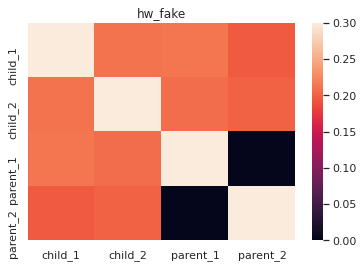

In [ ]:
# Use can sns.heatmap for pairwise mutual information
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.heatmap.html

import seaborn as sns; sns.set_theme()

z = sns.heatmap(orig_mi_df,vmax = 0.3, vmin = 0)
plt.title("hw_fake");

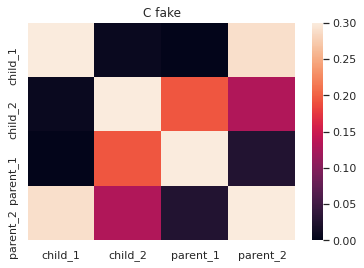

In [ ]:
x = sns.heatmap(c_mi_df,vmax = 0.3, vmin = 0)
plt.title("C fake");

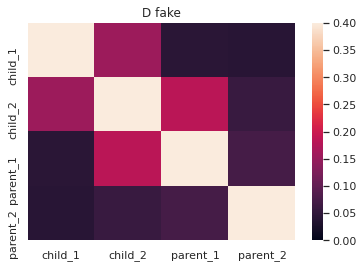

In [ ]:
y = sns.heatmap(d_mi_df,vmax = 0.4, vmin = 0)
plt.title("D fake");

## Part (b)

Study the variability in accuracy of answers to Q1 and Q2 for data generation mode A, B and C: fix epsilon = 0.1, generate __10__ synthetic databases (by specifying different seeds).  Plot accuracy as a box-and-whiskers plot.  

In [ ]:
median = np.zeros((3,10))
mean = np.zeros((3,10))
min = np.zeros((3,10))
max = np.zeros((3,10))

seeds = [0,1,2,3,4,5,6,7,8,9]

for i in range(10):
  # Set up some paths
  real_description_files = {'random mode':                   'description(random).json', 
                     'independent attribute mode':    'description(independent).json', 
                     'correlated attribute mode':     'description(correlated).json'}
  real_synthetic_data_files = {'random mode':                'synthetic data(random).csv', 
                        'independent attribute mode': 'synthetic data(independent).csv', 
                        'correlated attribute mode':  'synthetic data(correlated).csv'}
  
  # generate A using the seed
  describer.describe_dataset_in_random_mode(real_data_file)
  describer.save_dataset_description_to_file(real_description_files['random mode'])

  generator.generate_dataset_in_random_mode(n=output_data_size, 
                                          description_file=real_description_files['random mode'], 
                                          seed=seeds[i], 
                                          minimum=0, 
                                          maximum=100)
  generator.save_synthetic_data(real_synthetic_data_files['random mode'])
  a_random = pd.read_csv(real_synthetic_data_files['random mode'])

  # generate B using the seed and epsilon=0.1
  describer.describe_dataset_in_independent_attribute_mode(real_data_file, epsilon=0.1)
  describer.save_dataset_description_to_file(real_description_files['independent attribute mode'])  
  
  generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                          description_file=real_description_files['independent attribute mode'], 
                                          seed=seeds[i])
  
  generator.save_synthetic_data(real_synthetic_data_files['independent attribute mode'])
  b_independent = pd.read_csv(real_synthetic_data_files['independent attribute mode'])
  
  # generate C using the seed and epsilon=0.1
  describer.describe_dataset_in_correlated_attribute_mode(real_data_file, 
                                                        epsilon=0.1, 
                                                        k=1)
  describer.save_dataset_description_to_file(real_description_files['correlated attribute mode'])

  generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                          description_file=real_description_files['correlated attribute mode'], 
                                          seed=seeds[i])
  generator.save_synthetic_data(real_synthetic_data_files['correlated attribute mode'])
  c_correlate = pd.read_csv(real_synthetic_data_files['correlated attribute mode'])

  # calculate medians
  median[0][i] = a_random["age"].median()
  median[1][i] = b_independent["age"].median()
  median[2][i] = c_correlate["age"].median()

  # calculate mean
  mean[0][i] = a_random["age"].mean()
  mean[1][i] = b_independent["age"].mean()
  mean[2][i] = c_correlate["age"].mean()

  # calculate min 
  min[0][i] = a_random["age"].min()
  min[1][i] = b_independent["age"].min()
  min[2][i] = c_correlate["age"].min()

  # calculate max
  max[0][i] = a_random["age"].max()
  max[1][i] = b_independent["age"].max()
  max[2][i] = c_correlate["age"].max()


================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute sex
Adding attribute race
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute sex
Adding attribute race
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute sex
Adding attribute race
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute sex
Adding attribute race
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attri

In [ ]:
print(median)
print(mean)
print(min)
print(max)

[[50. 50. 50. 50. 50. 50. 50. 50. 52. 50.]
 [32. 33. 33. 33. 33. 33. 32. 33. 32. 32.]
 [38. 39. 39. 39. 39. 39. 38. 38. 38. 39.]]
[[50.3008 49.6333 50.1391 50.3169 50.3283 50.0036 50.0446 49.6582 50.8544
  50.0983]
 [36.8834 37.146  37.136  37.0686 36.9816 37.3839 36.7614 36.9225 36.8984
  37.0638]
 [45.2641 45.6694 45.6183 45.354  45.5823 45.8275 44.9928 45.1527 45.2163
  45.3867]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [18. 18. 18. 18. 18. 18. 18. 18. 18. 18.]
 [18. 18. 18. 18. 18. 18. 18. 18. 18. 18.]]
[[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [ 96.  95.  96.  96.  96.  96.  96.  96.  96.  96.]
 [ 96.  96.  96.  96.  96.  96.  96.  96.  96.  96.]]


Plot median, mean, min, max as a box-and-whiskers plot of the values for all 10 databases, and evaluate the accuracy of the synthetic data by comparing these metrics to the ground truth median, mean, min, and max from the real data.

No handles with labels found to put in legend.


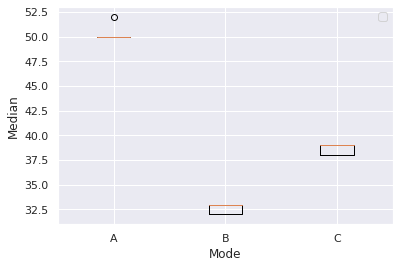

In [ ]:
# Median plot
x_init = list(range(len(median)))
x_tuned = [x + 0.35 for x in x_init]

plt.boxplot([median[0][:], median[1][:], median[2][:]], labels=['A', 'B', 'C'])

# Create labels, etc. 
plt.xlabel("Mode")
plt.ylabel("Median")
plt.legend()
plt.show()

No handles with labels found to put in legend.


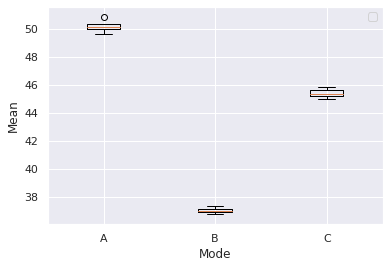

In [ ]:
# Mean plot
x_init = list(range(len(mean)))
x_tuned = [x + 0.35 for x in x_init]

plt.boxplot([mean[0][:], mean[1][:], mean[2][:]], labels=['A', 'B', 'C'])

# Create labels, etc. 
plt.xlabel("Mode")
plt.ylabel("Mean")
plt.legend()
plt.show()

No handles with labels found to put in legend.


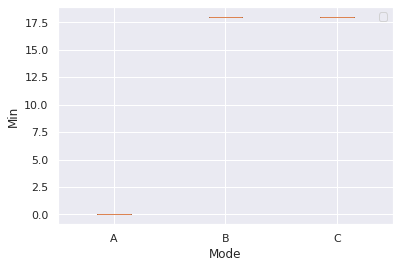

In [ ]:
# Min plot
x_init = list(range(len(min)))
x_tuned = [x + 0.35 for x in x_init]

plt.boxplot([min[0][:], min[1][:], min[2][:]], labels=['A', 'B', 'C'])

# Create labels, etc. 
plt.xlabel("Mode")
plt.ylabel("Min")
plt.legend()
plt.show()

No handles with labels found to put in legend.


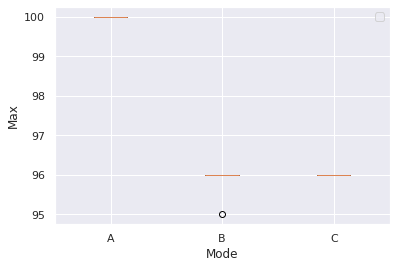

In [ ]:
# Max plot
x_init = list(range(len(max)))
x_tuned = [x + 0.35 for x in x_init]

plt.boxplot([max[0][:], max[1][:], max[2][:]], labels=['A', 'B', 'C'])

# Create labels, etc. 
plt.xlabel("Mode")
plt.ylabel("Max")
plt.legend()
plt.show()

## Part (c)

Study how metrics of Q3 changes for data generation mode B, C, and D, as you vary __epsilon__.

In [ ]:
'''
b_median = np.zeros((10,10))
b_mean = np.zeros((10,10))
b_min = np.zeros((10,10))
b_max = np.zeros((10,10))

c_median = np.zeros((10,10))
c_mean = np.zeros((10,10))
c_min = np.zeros((10,10))
c_max = np.zeros((10,10))

d_median = np.zeros((10,10))
d_mean = np.zeros((10,10))
d_min = np.zeros((10,10))
d_max = np.zeros((10,10))
'''
b_kl_test = np.zeros((10,10))
c_kl_test = np.zeros((10,10))
d_kl_test = np.zeros((10,10))

seed = [0,1,2,3,4,5,6,7,8,9]
epsilon = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

for i in range(10):
  for j in range(10): 
    # Set up some paths
    real_description_files = {'independent attribute mode':    'description(independent).json', 
                        'correlated attribute mode':     'description(correlated).json',
                        'correlated attribute mode k=2':     'description(correlated).json'}
    real_synthetic_data_files = {'independent attribute mode': 'synthetic data(independent).csv', 
                            'correlated attribute mode':  'synthetic data(correlated).csv',
                            'correlated attribute mode k=2':  'synthetic data(correlated).csv'}
      
    # generate B using the seed and epsilon
    describer.describe_dataset_in_independent_attribute_mode(real_data_file, epsilon=epsilon[j])
    describer.save_dataset_description_to_file(real_description_files['independent attribute mode'])  
      
    generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                              description_file=real_description_files['independent attribute mode'], 
                                              seed=seeds[i])
      
    generator.save_synthetic_data(real_synthetic_data_files['independent attribute mode'])
    b_independent = pd.read_csv(real_synthetic_data_files['independent attribute mode'])
      
    # generate C using the seed and epsilon
    describer.describe_dataset_in_correlated_attribute_mode(real_data_file, 
                                                            epsilon=epsilon[j], 
                                                            k=1)
    describer.save_dataset_description_to_file(real_description_files['correlated attribute mode'])

    generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                              description_file=real_description_files['correlated attribute mode'], 
                                              seed=seeds[i])
    generator.save_synthetic_data(real_synthetic_data_files['correlated attribute mode'])
    c_correlate = pd.read_csv(real_synthetic_data_files['correlated attribute mode'])

    # generate C using the seed and epsilon
    describer.describe_dataset_in_correlated_attribute_mode(real_data_file, 
                                                            epsilon=epsilon[j], 
                                                            k=2)
    describer.save_dataset_description_to_file(real_description_files['correlated attribute mode k=2'])

    generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                              description_file=real_description_files['correlated attribute mode k=2'], 
                                              seed=seeds[i])
    generator.save_synthetic_data(real_synthetic_data_files['correlated attribute mode k=2'])
    d_correlate = pd.read_csv(real_synthetic_data_files['correlated attribute mode k=2'])

    '''
    # calculate medians
    b_median[i][j] = b_independent["race"].median()
    c_median[i][j] = c_correlate["race"].median()
    d_median[i][j] = d_correlate["race"].median()

    # calculate mean
    b_mean[i][j] = b_independent["race"].mean()
    c_mean[i][j] = c_correlate["race"].mean()
    d_mean[i][j] = d_correlate["race"].mean()

    # calculate min 
    b_min[i][j] = b_independent["race"].min()
    c_min[i][j] = c_correlate["race"].min()
    d_min[i][j] = d_correlate["age"].min()

    # calculate max
    b_max[i][j] = b_independent["race"].max()
    c_max[i][j] = c_correlate["race"].max()
    d_max[i][j] = d_correlate["race"].max()
    '''
    # KL divergence
    b_kl_test[i][j] = kl_test(df_real, b_independent, 'race') 
    c_kl_test[i][j] =  kl_test(df_real, c_correlate, 'race') 
    d_kl_test[i][j] = kl_test(df_real, d_correlate, 'race') 



================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute sex
Adding attribute race
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute sex
Adding attribute race
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute sex
Adding attribute race
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute sex
Adding attribute race
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attri

In [ ]:
print(b_kl_test)
print(c_kl_test)
print(d_kl_test)
'''
print("B")
print(b_median)
print(b_mean)
print(b_min)
print(b_max)

print()
print("C")
print(c_median)
print(c_mean)
print(c_min)
print(c_max)

print("D")
print(d_median)
print(d_mean)
print(d_min)
print(d_max)
'''


[[0.55386952 0.21279474 0.12776633 0.08610023 0.06649214 0.05111238
  0.04065468 0.0315867  0.0265577  0.0214208 ]
 [0.53251418 0.21128173 0.12619512 0.08516519 0.06454891 0.05185206
  0.0401046  0.03208005 0.02685399 0.02352789]
 [0.55932633 0.22495529 0.12864946 0.08611085 0.0646978  0.05168984
  0.03678297 0.03165079 0.02425307 0.02157581]
 [0.53876762 0.21404992 0.12125308 0.08628543 0.06562448 0.05154167
  0.03867173 0.03296546 0.02865133 0.02374744]
 [0.54434028 0.20603024 0.12254057 0.08263598 0.06294908 0.04980312
  0.03765962 0.03171559 0.02560108 0.02192793]
 [0.55290641 0.2287234  0.12632665 0.08523503 0.06143612 0.0466738
  0.03608552 0.03042588 0.02485832 0.02085874]
 [0.55346214 0.21770824 0.13039335 0.08432376 0.06274539 0.04663581
  0.0364923  0.02924458 0.02313335 0.02019348]
 [0.55135223 0.21127666 0.12197943 0.08529253 0.06376292 0.05259197
  0.03976599 0.03208511 0.02637868 0.02270316]
 [0.54280458 0.2148003  0.12536219 0.08683761 0.06323363 0.05201454
  0.04115643 

'\nprint("B")\nprint(b_median)\nprint(b_mean)\nprint(b_min)\nprint(b_max)\n\nprint()\nprint("C")\nprint(c_median)\nprint(c_mean)\nprint(c_min)\nprint(c_max)\n\nprint("D")\nprint(d_median)\nprint(d_mean)\nprint(d_min)\nprint(d_max)\n'

- Plot the distributions of KL-divergence scores (10 samples each) with box-and-whiskers plots where you treat epsilon as the X-axis and generation settings as subplots. 


In [ ]:
# You can use sns.boxplot for the plots
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.boxplot.html

No handles with labels found to put in legend.


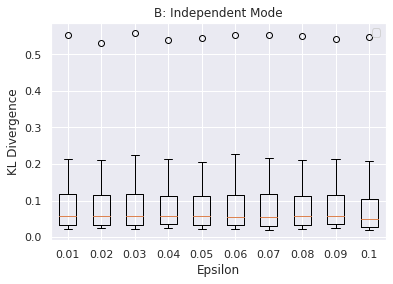

In [ ]:
# B independent plots
x_init = list(range(len(max)))
x_tuned = [x + 0.35 for x in x_init]

plt.boxplot([b_kl_test[0][:], b_kl_test[1][:], b_kl_test[2][:], 
             b_kl_test[3][:], b_kl_test[4][:], b_kl_test[5][:],
             b_kl_test[6][:], b_kl_test[7][:], b_kl_test[8][:],
             b_kl_test[9][:]], labels=['0.01', '0.02', '0.03', 
                                       '0.04', '0.05', '0.06', 
                                       '0.07', '0.08', '0.09', 
                                       '0.1'])

# Create labels, etc. 
plt.xlabel("Epsilon")
plt.ylabel("KL Divergence")
plt.title("B: Independent Mode")
plt.legend()
plt.show()

No handles with labels found to put in legend.


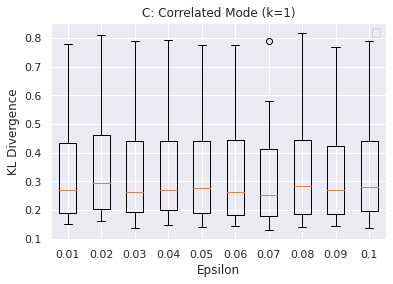

In [ ]:
# C correlated plots
x_init = list(range(len(max)))
x_tuned = [x + 0.35 for x in x_init]

plt.boxplot([c_kl_test[0][:], c_kl_test[1][:], c_kl_test[2][:], 
             c_kl_test[3][:], c_kl_test[4][:], c_kl_test[5][:],
             c_kl_test[6][:], c_kl_test[7][:], c_kl_test[8][:],
             c_kl_test[9][:]], labels=['0.01', '0.02', '0.03', 
                                       '0.04', '0.05', '0.06', 
                                       '0.07', '0.08', '0.09', 
                                       '0.1'])

# Create labels, etc. 
plt.xlabel("Epsilon")
plt.ylabel("KL Divergence")
plt.title("C: Correlated Mode (k=1)")
plt.legend()
plt.show()

No handles with labels found to put in legend.


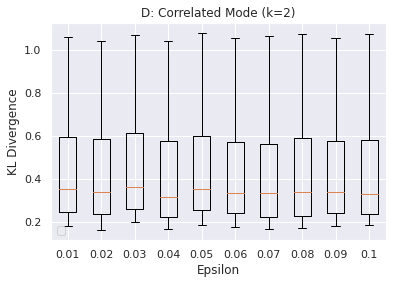

In [ ]:
# D correlated plots
x_init = list(range(len(max)))
x_tuned = [x + 0.35 for x in x_init]

plt.boxplot([d_kl_test[0][:], d_kl_test[1][:], d_kl_test[2][:], 
             d_kl_test[3][:], d_kl_test[4][:], d_kl_test[5][:],
             d_kl_test[6][:], d_kl_test[7][:], d_kl_test[8][:],
             d_kl_test[9][:]], labels=['0.01', '0.02', '0.03', 
                                       '0.04', '0.05', '0.06', 
                                       '0.07', '0.08', '0.09', 
                                       '0.1'])

# Create labels, etc. 
plt.xlabel("Epsilon")
plt.ylabel("KL Divergence")
plt.title("D: Correlated Mode (k=2)")
plt.legend()
plt.show()